### I am running different models to see how loss changes

#### load libraries

In [3]:
import os
import time
import torch
import numpy as np
import torch.nn as nn

os.environ['KMP_DUPLICATE_LIB_OK']='True'
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [98]:
import imp
from cell import  utils, plot_utils, analysis, graph_utils

imp.reload(utils)
imp.reload(plot_utils)

/Users/fahimehb/anaconda3/envs/py374/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/fahimehb/anaconda3/envs/py374/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/fahimehb/anaconda3/envs/py374/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/fahimehb/anaconda3/envs/py374/lib

<module 'cell.plot_utils' from '/Users/fahimehb/Documents/git-workspace/celltypes/cell/plot_utils.py'>

### run properties

In [5]:
#walk properties
N = 1
p = 1
q = 1
length = 10000

#walk filename
walk_filename = "walk_node_21_32_removed.csv"

#Directories
roi = "VISp"
layer_class = "single_layer"
project_name = "NPP_GNN_project"
layer = "base_unnormalized_allcombined"
walk_type = "Directed_Weighted_node2vec"

#run hyperparams
window = 2
n_epochs = 100
num_workers = 4
batch_size = 2000
embedding_size = 10
learning_rate = 0.001
opt_add = "node_21_32_removed"

### Get model and loss file path

In [52]:
def read_loss(embedding_size, project_name, roi, N, p, q, layer, layer_class, walk_type, 
              n_epochs, window, learning_rate, batch_size, opt_add):
    
    model_dir = utils.get_model_dir(project_name=project_name, 
                                    roi=roi, 
                                    length=length,
                                    N=N,
                                    p=p, 
                                    q=q, 
                                    layer=layer, 
                                    layer_class=layer_class, 
                                    walk_type=walk_type)

    model_name = utils.get_model_name(size=embedding_size, 
                                      iter=n_epochs, 
                                      window=window, 
                                      lr=learning_rate, 
                                      batch_size=batch_size, 
                                      opt_add=opt_add)

    loss_name = utils.get_loss_filename(size=embedding_size,
                                        iter=n_epochs, 
                                        window=window, 
                                        lr=learning_rate, 
                                        batch_size=batch_size,
                                        opt_add=opt_add)

    model_path = os.path.join(model_dir, model_name)
    loss_path = os.path.join(model_dir, loss_name)
    loss = utils.read_list_from_csv(loss_path)
    loss = [float(i) for i in loss]
    print(model_path)
    
    return loss

In [45]:
loss = {}
for emb_size in [2,5,10]:
    embedding_size = emb_size
    loss[emb_size] = read_loss(embedding_size, project_name, roi, N, p, q, layer, layer_class, 
                               walk_type, n_epochs, window, learning_rate, batch_size, opt_add)
    

### Plot loss for different embedding sizes

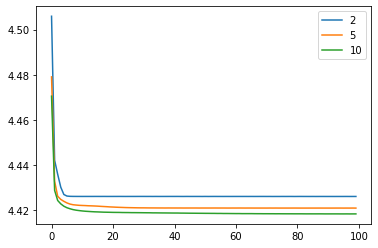

In [46]:
plt.plot(loss[2], label="2")
plt.plot(loss[5], label="5")
plt.plot(loss[10], label="10")
plt.legend(loc="upper right")

#### Loss is decreasing by increasing the embedding dimension

In [61]:
loss = {}
embedding_size = 10
opt_add = "node_21_32_removed"

loss[1] = read_loss(embedding_size, project_name, roi, N, p, q, layer, layer_class, walk_type,
                    n_epochs, window, learning_rate, batch_size, opt_add)

opt_add = None
loss[2] = read_loss(embedding_size, project_name, roi, N, p, q, layer, layer_class, walk_type,
                    n_epochs, window, learning_rate, batch_size, opt_add)

//Users/fahimehb/Documents/NPP_GNN_project/models/VISp/single_layer/Directed_Weighted_node2vec/N_1_l_10000_p_1_q_1/base_unnormalized_allcombined/model_size_10_iter_100_window_2_lr_0.001_bs_2000_node_21_32_removed.csv
//Users/fahimehb/Documents/NPP_GNN_project/models/VISp/single_layer/Directed_Weighted_node2vec/N_1_l_10000_p_1_q_1/base_unnormalized_allcombined/model_size_10_iter_100_window_2_lr_0.001_bs_2000.csv


### Plot loss for runs with different number of nodes

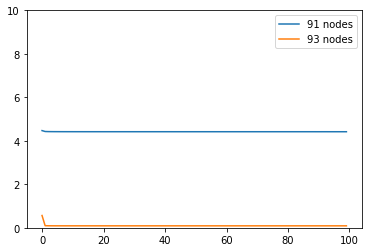

In [62]:
plt.plot(loss[1], label="91 nodes")
plt.plot(loss[2], label="93 nodes")
plt.ylim(0,10)
plt.legend(loc="upper right")

#### Loss decrease by increasing the number of nodes in a run

### Lets look at their edgelists

In [63]:
utils.get_edgelist_dir(roi, project_name, layer)

'//Users/fahimehb/Documents/NPP_GNN_project/dat/edgelists/VISp/base_unnormalized_allcombined'

In [80]:
edgelist_filename = "selfconnection_added_edges.csv"
edgelist_dir = utils.get_edgelist_dir(roi, project_name, layer)
edgelist_path = os.path.join(edgelist_dir, edgelist_filename)

In [81]:
edgelist = pd.read_csv(edgelist_path, index_col="Unnamed: 0")

In [106]:
edgelist

,source,target,weight
0,0,2,0.959233
1,0,9,1.165541
2,0,11,0.896152
3,0,13,0.577894
4,0,36,0.278507
...,...,...,...
8510,15,32,0.038961
8511,86,32,0.281690
8512,15,21,0.045455
8513,21,21,0.000006


### let me remove one of the nodes with many outgoing 

In [102]:
new_edgelist = graph_utils.remove_nodes_from_edglist(edgelist, ["40"])

In [105]:
new_edgelist_filename = "selfconnection_added_edges_node40_removed.csv"
new_edgelist_path = os.path.join(edgelist_dir, new_edgelist_filename)
new_edgelist.to_csv(new_edgelist_path)

In [107]:
edgelist.to_csv(os.path.join(edgelist_dir, "selfconnection_added_edges.csv"))

In [108]:
edgelist

,source,target,weight
0,0,2,0.959233
1,0,9,1.165541
2,0,11,0.896152
3,0,13,0.577894
4,0,36,0.278507
...,...,...,...
8510,15,32,0.038961
8511,86,32,0.281690
8512,15,21,0.045455
8513,21,21,0.000006


In [109]:
loss = {}
embedding_size = 2
opt_add = "node40_removed"

loss[1] = read_loss(embedding_size, project_name, roi, N, p, q, layer, layer_class, walk_type,
                    n_epochs, window, learning_rate, batch_size, opt_add)

opt_add = None
loss[2] = read_loss(embedding_size, project_name, roi, N, p, q, layer, layer_class, walk_type,
                    n_epochs, window, learning_rate, batch_size, opt_add)

//Users/fahimehb/Documents/NPP_GNN_project/models/VISp/single_layer/Directed_Weighted_node2vec/N_1_l_10000_p_1_q_1/base_unnormalized_allcombined/model_size_2_iter_100_window_2_lr_0.001_bs_2000_node40_removed.csv
//Users/fahimehb/Documents/NPP_GNN_project/models/VISp/single_layer/Directed_Weighted_node2vec/N_1_l_10000_p_1_q_1/base_unnormalized_allcombined/model_size_2_iter_100_window_2_lr_0.001_bs_2000.csv


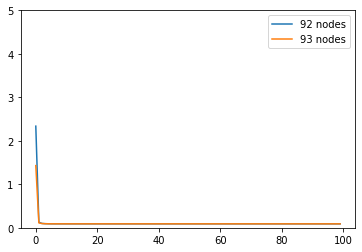

In [115]:
plt.plot(loss[1], label="92 nodes")
plt.plot(loss[2], label="93 nodes")
plt.ylim(0,5)
plt.legend(loc="upper right")